In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#data loading
df = pd.read_csv('Iris.csv')
df = df.drop('Id',axis='columns')


In [4]:
#getting a copy of dataset
df2 = df.copy()

In [5]:
#shape of dataset
df2.shape

(150, 5)

In [6]:
#checking the info of dataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#description for data
df2.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#checking the count of each species in Species columns
df2['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#checking the count for missing values
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***No NUll values in dataset***

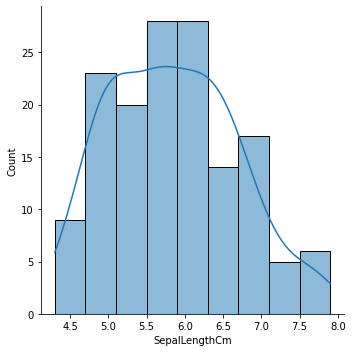

In [10]:
#distribution of SepalLengthCm
sns.displot(x='SepalLengthCm',data=df2,kde=True)

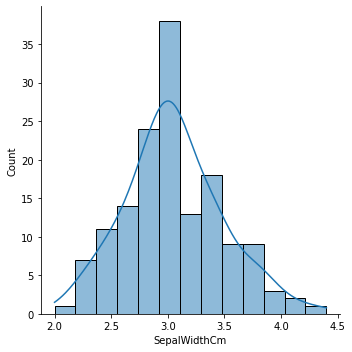

In [11]:
#distribution of SepalLengthCm
sns.displot(x='SepalWidthCm',data=df2,kde=True)

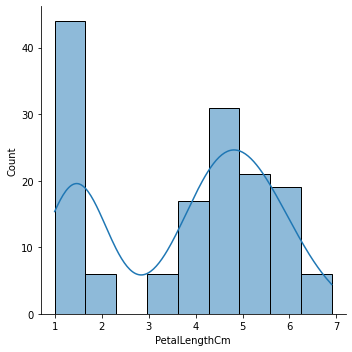

In [12]:
#distribution of SepalLengthCm
sns.displot(x='PetalLengthCm',data=df2,kde=True)

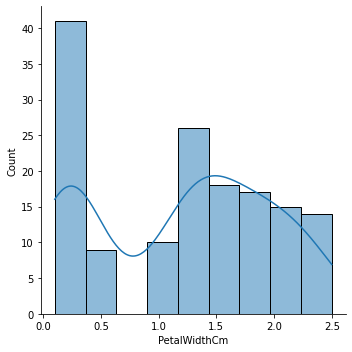

In [13]:
#distribution of SepalLengthCm
sns.displot(x='PetalWidthCm',data=df2,kde=True)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

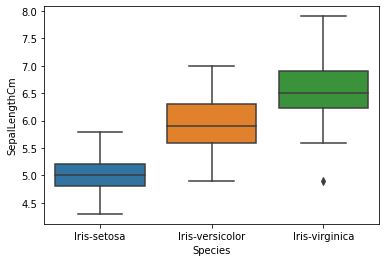

In [14]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df2)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

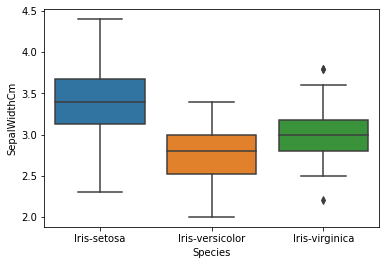

In [15]:
sns.boxplot(x='Species',y='SepalWidthCm',data=df2)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

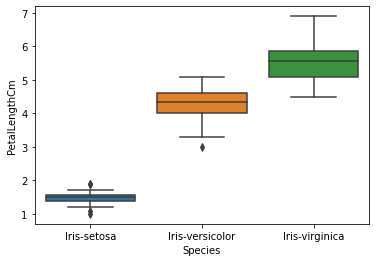

In [16]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df2)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

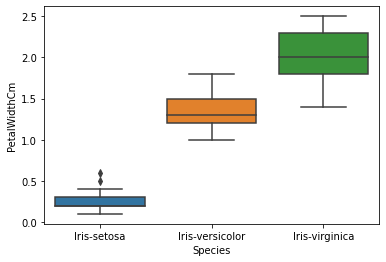

In [17]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df2)

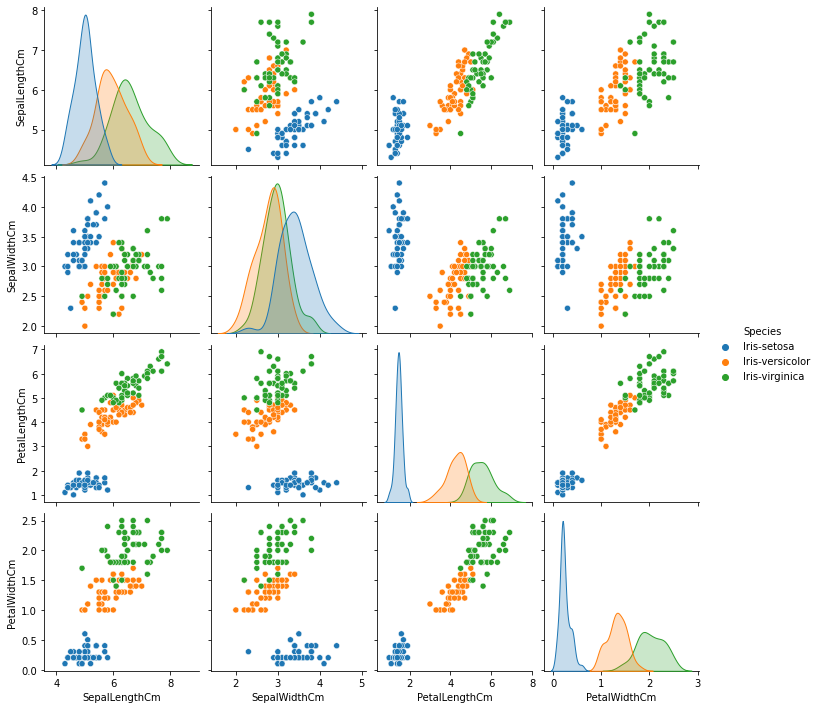

In [18]:
sns.pairplot(df2, hue="Species")

#### Setosa has completely seprated from all the two species

The optimal number of clusters can be defined as follow:

Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.

For each k, calculate the total within-cluster sum of square (wss).

Plot the curve of wss according to the number of clusters k.

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


In [19]:
X = df2.iloc[:, [0, 1, 2, 3]].values
y = df2.iloc[:,[-1]].values

In [21]:
ynum  = []
for i in y:
    if i  == 'Iris-setosa':
        ynum.append(0)
    elif i == 'Iris-versicolor':
        ynum.append(1)
    else:
        ynum.append(2)


In [22]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

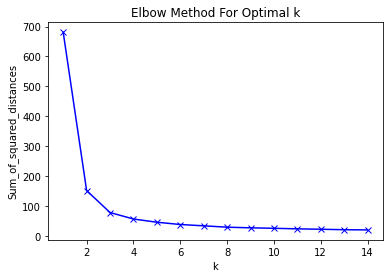

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***We can see that the exact bend lies between somewhere between 2-4 i.e 3, so optimal no of clusters equal to 3***

In [24]:
kmeansC = KMeans(n_clusters=3)
y_kmeansC = kmeansC.fit_predict(X)
print(y_kmeansC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


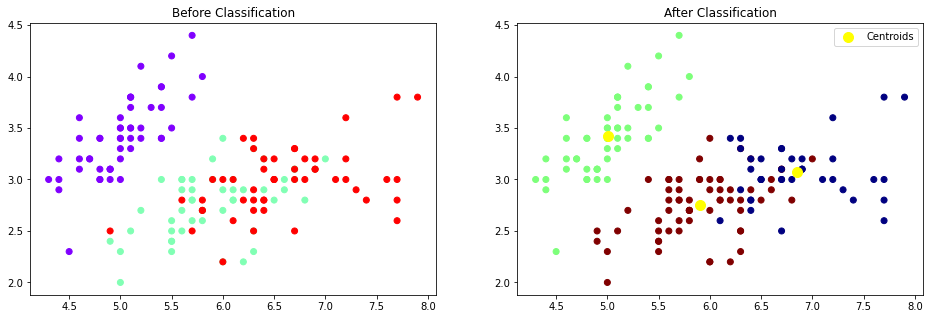

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(X[: ,0],X[:, 1],c=ynum,cmap='rainbow')
plt.title('Before Classification')
plt.subplot(1, 2, 2)
plt.scatter(X[: ,0],X[:, 1],c=y_kmeansC,cmap='jet')
plt.title('After Classification')
plt.scatter(kmeansC.cluster_centers_[:, 0], kmeansC.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()


## Thank You !!

In [47]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 0.9736842105263158


In [50]:
#Finding best alogrithms with score using Different Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Decision Tree's
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)

# Summary of the predictions made by the classifier2
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
# Accuracy score
print('accuracy is',accuracy_score(y_pred2,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 0.9736842105263158


In [56]:
# K-Nearest Neighbours
classifier3 = KNeighborsClassifier(n_neighbors=8)
classifier3.fit(X_train, y_train)

y_pred3 = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
# Accuracy score
print('accuracy is',accuracy_score(y_pred3,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy is 0.9736842105263158


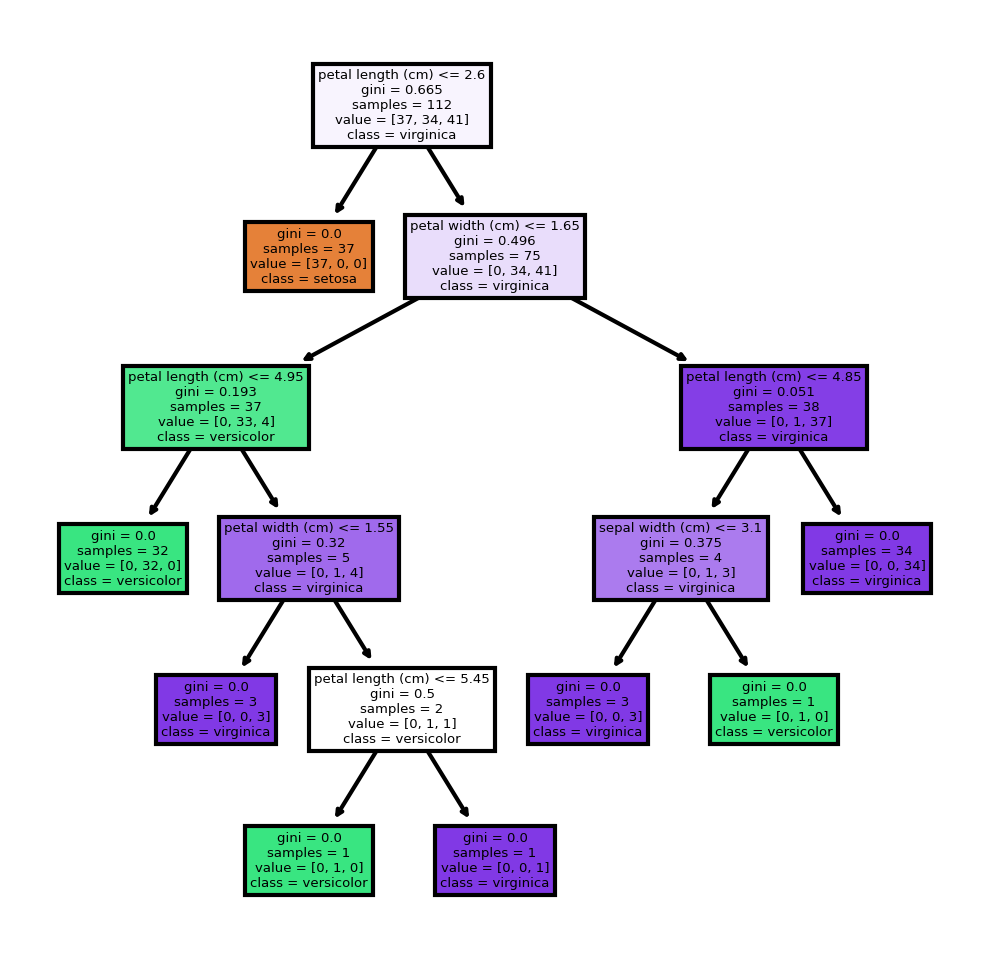

In [62]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# Thank You